#Proyecto de clasificación de un dataset TAA
## Juan Sebastian Garcia 
## Universidad Distrital Francisco Jose de Caldas

El siguiente proyecto se basa en el aprendizaje supervisado, para la clasificación de un conjunto de datos que sera dividido para entrenamiento y prueba.

Inicial mente cargamos el dataset disponible en https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data ; Esta base de datos contiene 279 atributos, distribuidos en valores lineales y valores nominales.

El objetivo de la toma de muestras es distinguir entre la presencia y ausencia de arritmia cardíaca y clasificarla en uno de los 16 grupos. La clase 01 se refiere a ECG 'normal'. Las clases 02 a 15 se refieren a diferentes clases. de arritmia y la clase 16 se refiere al resto de las no clasificadas

In [4]:
#Cargamos los datos de una carpeta local
f_in = open("arrhythmia.data",'r')
arrhythmia = f_in.readlines()
f_in.close()

#Seleccion inicial de columnas
Observando la descripción disponible en: https://archive.ics.uci.edu/ml/datasets/arrhythmia , se elige algunas caracteristicas lineales que posiblemente esten relacionadas con el diagnostico de arritmia cardíaca (esta selección se basa en suposiciones sin fundamento, el entendimiento de los de las señales cardiacas y esta fuera del alcance de este proyecto).

In [5]:
import pandas as pd
import numpy as np

alturas_cm=[]
pesos_kg=[]
Frecuencia_cardiaca=[] #Número de latidos cardíacos por minuto
Num_de_deflex=[]
T = [] #Duración media de la onda T en mseg
P = [] #Duración media de la onda P en mseg
Onda_Q=[] #Ancho promedio, en mseg onda Q
Onda_R=[] #Ancho promedio, en mseg onda R
Onda_S=[] #Ancho promedio, en mseg onda S
P_R = [] #duración promedio entre el inicio de las ondas P y R en mseg
Q_T = [] #duración promedio entre el inicio de Q y el final de las ondas T en mseg
grupos=[]
for renglon in arrhythmia:
  datos_ren_str = renglon.split(',')
  try:
      altura_cm = int(datos_ren_str[2])
      if altura_cm > 200:
        continue
      peso_kg = int(datos_ren_str[3])
      p_r = int(datos_ren_str[5])
      q_t = int(datos_ren_str[6])
      t = int(datos_ren_str[7])
      p = int(datos_ren_str[8])
      frecuencia_cardiaca = int(datos_ren_str[14])
      Onda_q = int(datos_ren_str[15])
      Onda_r = int(datos_ren_str[16])
      Onda_s = int(datos_ren_str[17])
      num_de_deflex = int(datos_ren_str[20]) 
      grupo = int(datos_ren_str[-1])
  except:
     continue
  alturas_cm.append(altura_cm)
  pesos_kg.append(peso_kg)
  Frecuencia_cardiaca.append(frecuencia_cardiaca)
  Num_de_deflex.append(num_de_deflex)
  T.append(t)
  P.append(p)
  Onda_Q.append(Onda_q)
  Onda_R.append(Onda_r)
  Onda_S.append(Onda_s)
  P_R.append(p_r)
  Q_T.append(q_t)
  grupos.append(grupo)

minima,maxima=min(pesos_kg),max(pesos_kg)
peso_car=[int((i-minima)/10) for i in pesos_kg  ]

minima,maxima=min(alturas_cm),max(alturas_cm)
altura_car=[int((i-minima)/10) for i in alturas_cm  ]

minima,maxima=min(Frecuencia_cardiaca),max(Frecuencia_cardiaca)
Frecuencia_cardiaca_car=[int((i-minima)/10) for i in Frecuencia_cardiaca  ]

minima,maxima=min(Num_de_deflex),max(Num_de_deflex)
Num_de_deflex_car=[int((i-minima)/10) for i in Num_de_deflex  ]

minima,maxima=min(T),max(T)
T_car=[int((i-minima)/10) for i in T  ]

minima,maxima=min(P),max(P)
P_car=[int((i-minima)/10) for i in P  ]

minima,maxima=min(Onda_Q),max(Onda_Q)
Onda_Q_car=[int((i-minima)/10) for i in Onda_Q  ]

minima,maxima=min(Onda_R),max(Onda_R)
Onda_R_car=[int((i-minima)/10) for i in Onda_R  ]

minima,maxima=min(Onda_S),max(Onda_S)
Onda_S_car=[int((i-minima)/10) for i in Onda_S  ]

minima,maxima=min(P_R),max(P_R)
P_R_car=[int((i-minima)/10) for i in P_R ]

minima,maxima=min(Q_T),max(Q_T)
Q_T_car=[int((i-minima)/10) for i in Q_T ]

minima,maxima=min(grupos),max(grupos)
grupos_car=[i-1 for i in grupos ]



#data = pd.DataFrame(list(zip(altura,peso,Frecuencia_cardiaca,Num_de_deflex,T_car,P,Onda_Q,Onda_R,Onda_S,P_R,Q_T,grupos)),
 #                           columns =['alturas_cm', 'pesos_kg','Frecuencia_cardiaca','Num_de_deflex','T','P','Onda_Q','Onda_R','Onda_S','P_R','Q_T','Salida']) # No escalados
data = pd.DataFrame(list(zip(altura_car,peso_car,Frecuencia_cardiaca_car,Num_de_deflex_car,T_car,P_car,Onda_Q_car,Onda_R_car,Onda_S_car,P_R_car,Q_T_car,grupos_car)),
                            columns =['alturas_cm', 'pesos_kg','Frecuencia_cardiaca','Num_de_deflex','T','P','Onda_Q','Onda_R','Onda_S','P_R','Q_T','Salida'])
data.head()

,alturas_cm,pesos_kg,Frecuencia_cardiaca,Num_de_deflex,T,P,Onda_Q,Onda_R,Onda_S,P_R,Q_T,Salida
0,8,7,1,3,6,12,0,5,4,19,13,7
1,6,5,0,2,4,3,0,4,0,17,16,5
2,6,8,3,2,7,10,0,4,8,16,14,9
3,7,8,2,4,7,14,0,7,2,20,14,0
4,6,4,4,2,6,9,0,3,4,16,8,13


Se construcción el DataFrame, cuyo dato se salida esta en la ultima columna

##Pre-procesamiento de datos
Ya que utilizaremos un metodo de clasificación basada en regresión logistica, es necesario ajustar la salida a 0 o 1, donde:
<table>
  <tr>
    <th>Salida</th>
    <th>Salida ajustada</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Paciente sin arritmia (0)</td>   
  </tr>
  <tr>
    <td>2-16</td>
    <td>Paciente con arritmia (1)</td>   
  </tr>
   
</table>
Lo anterior indica que si la salida es 0 el diagnostico es negativo, de lo contrario el diagnostico es positivo.

In [6]:
# Realizamos el preprocesamiento de la salida
Pre_out = data['Salida'].copy() # Creamos una copia de la columna de salida.
for index, value in enumerate(grupos):
    if value == 1:
      Pre_out[index] = 0
    else:
      Pre_out[index] = 1
Pre_out

0      1
1      1
2      1
3      0
4      1
      ..
444    0
445    1
446    1
447    0
448    0
Name: Salida, Length: 449, dtype: int64

De esta forma aseguramos que la salida (y) sea un 1 o 0, de tal forma que podamos usar el metodo de regresión logistica como clasificador

Selección datos de entrada y salida del dataset creado previamente

In [7]:
X = data.iloc[:,:11] # Seleccionamos las primeras 11 columnas del DataFrame correspondiente a las entradas
y = Pre_out # Seleccionamos la Salida previamente modificada
m,n = X.shape
m,n

(449, 11)

In [24]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
np.random.seed(7)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                       X,
                                       y,
                                        train_size   = 0.5,
                                        random_state = 1234,
                                        shuffle      = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((224, 11), (225, 11), (224,), (225,))

# Clasificación sin discriminación de Columnas
Inicialmente realizaremos el ejercicio de clasificación con los datos de entrada sin ningun tipo de modificación.
## Vecino mas cercano


In [86]:
from scipy.linalg.decomp_svd import zeros
k_min, err_min = np.inf,np.inf
i = 200
ks, errores = np.zeros(i-1),np.zeros(i-1) # Declaramos los arreglos en donde se van a guardar los valores de k y el error
for k in range(1,i,1):
  model = KNeighborsRegressor(n_neighbors=k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  error = mean_squared_error(y_test, y_pred)
  ks[k-1] = k # Guardamos los valores de en un arreglo
  errores[k-1] = error # Guardamos los valores de error de cada k en un arreglo
  # Evaluamos el error minimo y guardamos el valor de k de dicho valor
  if error<err_min:
    err_min = error
    kf = k
    rmse_vecinosn = mean_squared_error(y_test, y_pred)
print('El minimo error encontrado es',rmse_vecinosn,', cuyo valor de k es',kf)

El minimo error encontrado es 0.22275555555555554 , cuyo valor de k es 25


##Bayes

In [88]:
from sklearn.naive_bayes import CategoricalNB
X_train, X_test, y_train, y_test = train_test_split(
                                       X,
                                       y,
                                        train_size   = 0.5,
                                        random_state = 1234,
                                        shuffle      = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


clf = CategoricalNB()
clf.fit(X_train, y_train)
rmse_Bayen = mean_squared_error(y_test, y_pred)
presBn = accuracy_score(y_train, clf.predict(X_train))
print('El error en la predicción corresponde a:',rmse_Bayen,',con una precisión de:',presBn)


El error en la predicción corresponde a: 0.24461514720447575 ,con una precisión de: 0.8169642857142857


#Regresión Logistica

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
                                       X,
                                       y,
                                        train_size   = 0.5,
                                        random_state = 1234,
                                        shuffle      = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

modelo = LogisticRegression()
modelo.fit(X = X_train, y = y_train)
presRLn = accuracy_score(y_train, modelo.predict(X_train))
rmse_RLn = mean_squared_error(y_test, y_pred)
print('El error en la predicción corresponde a:',rmse_RLn,',con una precisión de:',presRLn)


El error en la predicción corresponde a: 0.24461514720447575 ,con una precisión de: 0.6651785714285714


#Discriminación de columnas


##Penalidad tipo Ridge

In [34]:
modelo = LogisticRegression(penalty='l2', solver='liblinear')

modelo.fit(X = X_train, y = y_train)
coef_cresta = abs(modelo.coef_.flatten())


,alturas_cm,pesos_kg,Frecuencia_cardiaca,Num_de_deflex,T,P,Onda_Q,Onda_R,Onda_S,P_R,Q_T
0,8,7,1,3,6,12,0,5,4,19,13
1,6,5,0,2,4,3,0,4,0,17,16
2,6,8,3,2,7,10,0,4,8,16,14
3,7,8,2,4,7,14,0,7,2,20,14
4,6,4,4,2,6,9,0,3,4,16,8


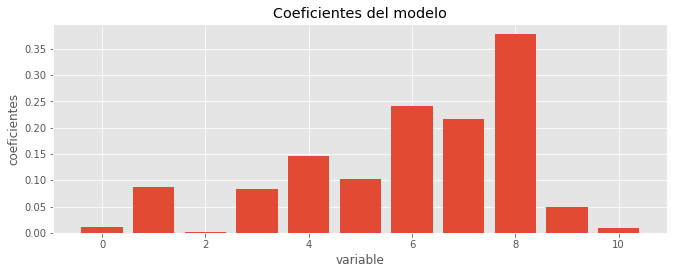

In [35]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.bar(range(n),abs(modelo.coef_.flatten()))
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');
X.head()


In [61]:
modelo.coef_
zeros = np.count_nonzero(abs(modelo.coef_) < 0.0099)
zeros

1

Si mantenemos el criterio de despreciar los coeficientes menores a 0.01, con el metodo Ridge podriamos despreciar 2 coeficientes

##Penalidad LASSO (Least absolute shrinkage and selection operator)

In [37]:
modelo = LogisticRegression(penalty='l1', solver='liblinear')
modelo.fit(X = X_train, y = y_train)
coef_lasso = abs(modelo.coef_.flatten())

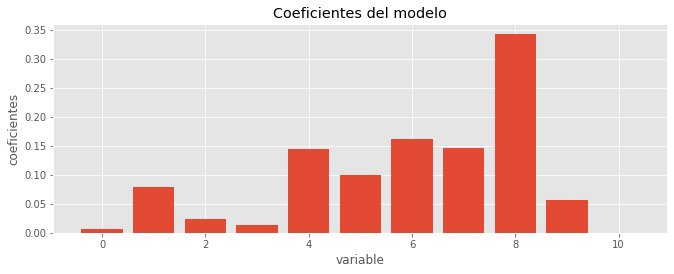

In [38]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.bar(range(n),abs(modelo.coef_.flatten()))
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

<BarContainer object of 11 artists>

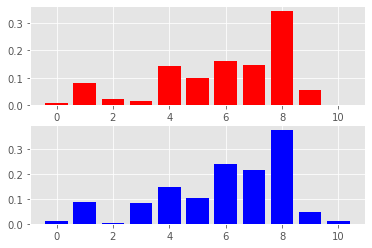

In [40]:
fig, ax = plt.subplots(2)
ax[0].bar(range(n),coef_lasso,color='r')
ax[1].bar(range(n),coef_cresta,color='b')




**Teniendo en cuenta el criterio de discrimar los coeficientes menores a 0.01 podriamos despreciar las columnas 2 y 10**, por lo que creamos una copia del Dataset principal, eliminando las columnas ['Frecuencia_cardiaca']

#Clasificación con discriminación de columnas

In [62]:
columns2 =['alturas_cm', 'pesos_kg','Frecuencia_cardiaca','Num_de_deflex','T','P',
          'Onda_Q','Onda_R','Onda_S','P_R','Q_T','Salida']
#columns2 = columns2.pop(0)
data2 = data.copy()
data2 = data2.drop(['Frecuencia_cardiaca'],axis=1)
data2

,alturas_cm,pesos_kg,Num_de_deflex,T,P,Onda_Q,Onda_R,Onda_S,P_R,Q_T,Salida
0,8,7,3,6,12,0,5,4,19,13,7
1,6,5,2,4,3,0,4,0,17,16,5
2,6,8,2,7,10,0,4,8,16,14,9
3,7,8,4,7,14,0,7,2,20,14,0
4,6,4,2,6,9,0,3,4,16,8,13
...,...,...,...,...,...,...,...,...,...,...,...
444,5,6,2,4,11,0,5,2,19,14,0
445,8,7,2,9,7,0,4,3,13,12,9
446,6,5,4,8,11,1,4,4,17,12,1
447,5,4,3,11,6,0,5,0,10,14,0


De esta forma repetimos el ejercicio anteriormente realizado, con el fin de evaluar la relevancia de eliminar columnas, por lo que inicialmente seleccionamos los datos de entrada y salida.

In [91]:
data2
Xf = data2.iloc[:,:9]
yf = y = Pre_out
m,n = Xf.shape
m,n

(449, 9)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
                                       Xf,
                                       yf,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
Xf,yf #La clase 01 se refiere a ECG 'normal'. Las clases 02 a 15 se refieren a diferentes clases. 
#de arritmia y la clase 16 se refiere al resto de las no clasificadas. Por el momento, existe un programa informático que realiza dicha clasificación.


(     alturas_cm  pesos_kg  Num_de_deflex   T   P  Onda_Q  Onda_R  Onda_S  P_R
 0             8         7              3   6  12       0       5       4   19
 1             6         5              2   4   3       0       4       0   17
 2             6         8              2   7  10       0       4       8   16
 3             7         8              4   7  14       0       7       2   20
 4             6         4              2   6   9       0       3       4   16
 ..          ...       ...            ...  ..  ..     ...     ...     ...  ...
 444           5         6              2   4  11       0       5       2   19
 445           8         7              2   9   7       0       4       3   13
 446           6         5              4   8  11       1       4       4   17
 447           5         4              3  11   6       0       5       0   10
 448           5         6              2   3   7       0       4       2   12
 
 [449 rows x 9 columns], 0      1
 1      1
 2    

##Vecino mas cercano

In [93]:
from scipy.linalg.decomp_svd import zeros
k_min, err_min = np.inf,np.inf
i = 100
ks, errores = np.zeros(i-1),np.zeros(i-1) # Declaramos los arreglos en donde se van a guardar los valores de k y el error
for k in range(1,i,1):
  model = KNeighborsRegressor(n_neighbors=k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  error = mean_squared_error(y_test, y_pred)
  ks[k-1] = k # Guardamos los valores de en un arreglo
  errores[k-1] = error # Guardamos los valores de error de cada k en un arreglo
  # Evaluamos el error minimo y guardamos el valor de k de dicho valor
  if error<err_min:
    err_min = error
    kf = k
    rmse_vecinos = mean_squared_error(y_test, y_pred)
rmse_Bayes = rmse_vecinos
print('El minimo error encontrado es',rmse_vecinos,', cuyo valor de k es',kf)



El minimo error encontrado es 0.233544921875 , cuyo valor de k es 64


##Bayes

In [94]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)
rmse_Baye = mean_squared_error(y_test, y_pred)
pres = accuracy_score(y_train, clf.predict(X_train))
print('El error en la predicción corresponde a:',rmse_Baye,',con una precisión de:',pres)

El error en la predicción corresponde a: 0.23777619063814348 ,con una precisión de: 0.7707006369426752


##Regresión logistica

In [95]:
modelo = LogisticRegression()
modelo.fit(X = X_train, y = y_train)
presRL = accuracy_score(y_train, modelo.predict(X_train))
rmse_RL = mean_squared_error(y_test, y_pred)
print('El error en la predicción corresponde a:',rmse_RL,',con una precisión de:',presRL)

El error en la predicción corresponde a: 0.23777619063814348 ,con una precisión de: 0.6496815286624203


#Conclusion
El mejor metodo de clasificación encontrado fue el de vecinos cercanos, cuyo error de prediccón fue del 22.27%; respecto a la clasificación post eliminación de columnas se encontro que para el metodo de Bayes y Regresión Logistica el error en la predicción disminuyo, mientras que para el metodo de Vecinos Cercanos aumento.

In [102]:
#Conclusión
print('Vecinos cercanos')
print('Los errores encontrados con y sin discriminación de columnas es:',rmse_vecinos,'y',rmse_vecinosn,'respectivamente')
print('Regresión logistica')
print('Los errores encontrados con y sin discriminación de columnas es:',rmse_RL,'y',rmse_RLn,'respectivamente')

Vecinos cercanos
Los errores encontrados con y sin discriminación de columnas es: 0.233544921875 y 0.22275555555555554 respectivamente
Regresión logistica
Los errores encontrados con y sin discriminación de columnas es: 0.23777619063814348 y 0.24461514720447575 respectivamente
